<a href="https://colab.research.google.com/github/Elman295/Paper_with_code/blob/main/Classification_of_Image_using_Convolutional_Neural_Network_(CNN)_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch import nn 
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trans = transforms.Compose([
    
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.5,0.5,0.5), std = (0.5,0.5,0.5))
])


training_data = datasets.CIFAR10(
    
    root = "data",
    train = True,
    download = True,
    transform= trans
)



validation_data = datasets.CIFAR10(
    
    root = "data",
    train = False,
    download = True,
    transform = trans
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
training_data.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [4]:
classes = training_data.classes

image, label = training_data[0] 

print(image.shape)
print(image.dtype)
print(classes[label])

torch.Size([3, 32, 32])
torch.float32
frog


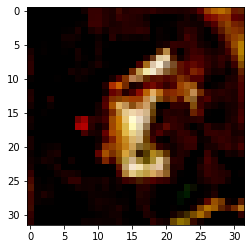

In [5]:
plt.imshow(np.transpose(image)) 
plt.show()

In [6]:
batch_size = 60

train_dataloader =DataLoader(dataset = training_data, batch_size = 64, shuffle = True) 

test_dataloader = DataLoader(dataset = validation_data, batch_size = 64, shuffle = True)

In [7]:
train_dataloader.dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [8]:
len(train_dataloader) # number of batches

782

In [32]:
class CNN_Model(nn.Module):

  def __init__(self):
    super(CNN_Model, self).__init__()
    self.layer_1 = nn.Conv2d(3,32,5) 
    self.MP = nn.MaxPool2d(2,2)
    self.layer_3 = nn.Conv2d(32,32,5)
    self.AP = nn.AvgPool2d(2,2)
    self.layer_5 = nn.Conv2d(32,64,5) 
    self.fc1 = nn.Linear(1*1*64,10)


  def forward(self, x):

    x = self.MP(F.relu(self.layer_1(x))) 
    x = self.AP(F.relu(self.layer_3(x))) 
    x = F.relu(self.layer_5(x)) 
    x = torch.flatten(x,1) 
    logits = self.fc1(x)
    return logits




In [33]:
noise = torch.randn(size = (1,3,32,32))
model_1 = CNN_Model()
print(model_1(noise))

tensor([[ 0.0165, -0.0480, -0.0462, -0.1002,  0.1727,  0.0245,  0.0946, -0.0498,
         -0.0898,  0.0049]], grad_fn=<AddmmBackward0>)


In [34]:
model_1

CNN_Model(
  (layer_1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (MP): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer_3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (AP): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (layer_5): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=10, bias=True)
)

In [35]:
model_1.get_parameter

<bound method Module.get_parameter of CNN_Model(
  (layer_1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (MP): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer_3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (AP): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (layer_5): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=10, bias=True)
)>

In [36]:
def train(dataloader, model, loss_function, optimizer):
  size = len(dataloader.dataset) 

  for batch, (x,y) in enumerate(dataloader):
    x,y = x.to(torch.device("cuda")), y.to(torch.device("cuda"))

    y_pred = model(x) 
    loss = loss_function(y_pred,y) 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(x) 
      print(f"loss is {loss}, [{current} / {size}]")


In [37]:
def test(dataloader, model, loss_function):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  correct, test_loss = 0,0
  with torch.no_grad():
    for x,y in dataloader:
      x,y = x.to(torch.device("cuda")), y.to(torch.device("cuda"))
      y_pred = model(x) 
      test_loss += loss_function(y_pred, y).item() 
      correct += (y_pred.argmax(1) == y).type(torch.float).sum().item() 
  test_loss /= num_batches
  correct /= size 

  print(f"accuracy is {correct * 100}, test_loss is {test_loss}") 

In [39]:
optimizer_fn = torch.optim.SGD(params = model_1.parameters(), lr = 1e-3)
loss_fn = nn.CrossEntropyLoss() 

In [40]:
torch.cuda.is_available()

model_1.to(torch.device("cuda")) 



CNN_Model(
  (layer_1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (MP): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer_3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (AP): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (layer_5): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=10, bias=True)
)

In [41]:
EPOCHS = 50

for epoch in range(EPOCHS):
  print(f"epoch:{epoch+1}-----------------------------------")
  train(train_dataloader, model_1, loss_fn,optimizer_fn) 
  test(test_dataloader, model_1, loss_fn) 

print("DONE!!!")

epoch:1-----------------------------------
loss is 2.303088903427124, [0 / 50000]
loss is 2.3022475242614746, [6400 / 50000]
loss is 2.291127920150757, [12800 / 50000]
loss is 2.3105125427246094, [19200 / 50000]
loss is 2.2987043857574463, [25600 / 50000]
loss is 2.3014914989471436, [32000 / 50000]
loss is 2.303316116333008, [38400 / 50000]
loss is 2.2904653549194336, [44800 / 50000]
accuracy is 11.06, test_loss is 2.2978102705281254
epoch:2-----------------------------------
loss is 2.3023948669433594, [0 / 50000]
loss is 2.2902958393096924, [6400 / 50000]
loss is 2.286245584487915, [12800 / 50000]
loss is 2.288184642791748, [19200 / 50000]
loss is 2.2879226207733154, [25600 / 50000]
loss is 2.3047165870666504, [32000 / 50000]
loss is 2.2935030460357666, [38400 / 50000]
loss is 2.289886236190796, [44800 / 50000]
accuracy is 14.499999999999998, test_loss is 2.2886234483901102
epoch:3-----------------------------------
loss is 2.290912628173828, [0 / 50000]
loss is 2.2863738536834717, [